In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

# Life Expectancy and GDP
In this project, GDP and life expectancy data from the World Health Organization and the World Bank will be analysed and tried to find the relationship between them.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

Data: `all_data.csv`

In [3]:
# Import python modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
sns.set_palette('Set2')
# Set style
sns.set_style('darkgrid')

# all_data.csv
The dataset provided has the following columns of data:

+ Country: nation
+ Year: the year for the observation
+ Life expectancy at birth (years): life expectancy value in years
+ GDP: Gross Domestic Product in U.S. dollars

In [4]:
# Load the data and preview
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.nunique()

Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64

In [6]:
# Explore the data
print('Country: ', df.Country.unique())
print('Year: ', df.Year.unique())
# print('Year: ', df.Year.min(), ' to ', df.Year.max())
print('Life expectancy: ', df['Life expectancy at birth (years)'].min(), ' to ', 
      df['Life expectancy at birth (years)'].max(), ' years old.')
print('GDP: ', '{:.2f}'.format(df.GDP.min()/10**9), ' to ', 
      '{:,.2f}'.format(df.GDP.max()/10**9), ' trillion dollars.')

Country:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Year:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Life expectancy:  44.3  to  81.0  years old.
GDP:  4.42  to  18,100.00  trillion dollars.


In [7]:
df[df.isnull().any(axis=1)]
## No NaN values

,Country,Year,Life expectancy at birth (years),GDP


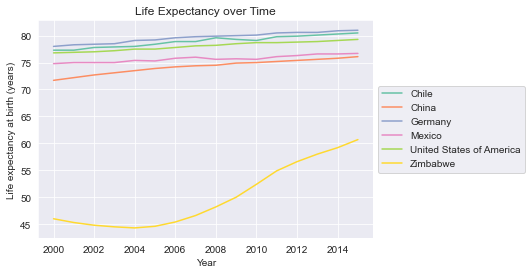

In [8]:
# Has life expectancy increased over time in the six nations?
sns.lineplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country')
plt.title('Life Expectancy over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

## Yes but there is a slight decrease in Zimbabwe in the first five years

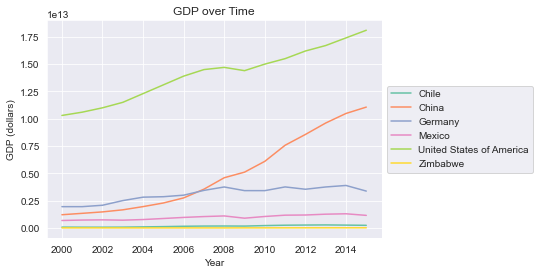

In [9]:
# Has GDP increased over time in the six nations?
sns.lineplot(data = df, x = 'Year', y = 'GDP', hue = 'Country')
plt.title('GDP over Time')
plt.ylabel('GDP (dollars)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

## Yes and it changed diversely in each country

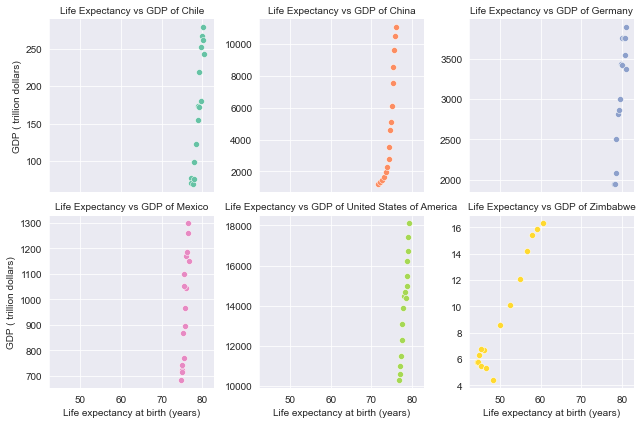

In [13]:
# Is there a correlation between GDP and life expectancy of a country?
df['GDP_trillions'] = df.GDP/10**9
graphGDP = sns.FacetGrid(df, col = 'Country', col_wrap=3,hue = 'Country', sharey = False)
graphGDP = (graphGDP.map(sns.scatterplot, 'Life expectancy at birth (years)', 'GDP_trillions')
         .set_axis_labels('Life expectancy at birth (years)', 'GDP ( trillion dollars)'))
graphGDP.set_titles('Life Expectancy vs GDP of {col_name}')
plt.show()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


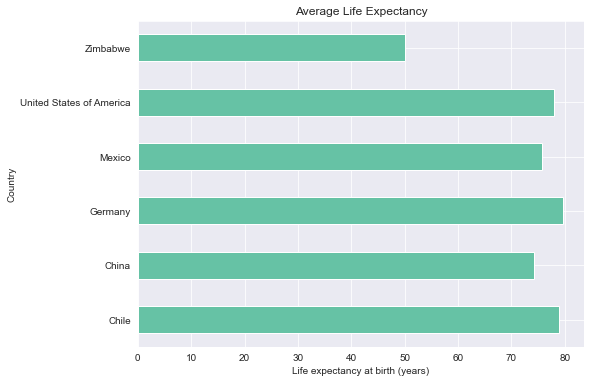

In [11]:
# What is the average life expectancy in these nations?
LE_co = df.groupby('Country')['Life expectancy at birth (years)'].mean()
print(LE_co)

c = LE_co.plot(kind = 'barh', figsize=(8,6))
plt.title('Average Life Expectancy')
plt.xlabel('Life expectancy at birth (years)')
plt.show()

/Users/kurapika/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kurapika/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/kurapika/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futu

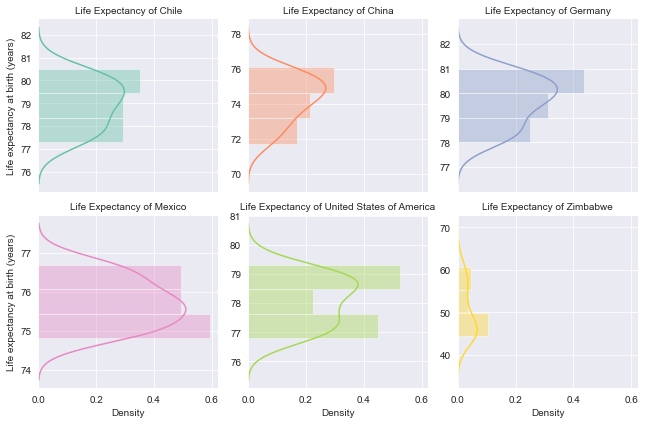

In [12]:
# What is the distribution of that life expectancy?
graphLE = sns.FacetGrid(df, col = 'Country', col_wrap=3, hue = 'Country', sharey = False)
graphLE = (graphLE.map(sns.distplot, 'Life expectancy at birth (years)', vertical=True))
graphLE.set_titles('Life Expectancy of {col_name}')
graphLE.set_xlabels('Density')
graphLE.set_ylabels('Life expectancy at birth (years)')
plt.show()

# Conclusion
The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.
